In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from synthacc.source.moment import mw_to_m0
from synthacc.source.scaling import WC1994_m2a, ThingbaijamEA2017_m2a_n, WC1994_m2as, ThingbaijamEA2017_m2as_n

from faults import rauw_simple_fault
from rupture import kinematic_rupture_calculator_logic_tree

In [2]:
krclt = kinematic_rupture_calculator_logic_tree()

In [3]:
fault = rauw_simple_fault()
magnitude = 6.5

In [4]:
areas, ls, ws = [], [], []

names = []

for i in range(5000):
    krc, leaf = krclt()
    sc = krc.fsc
    s = sc(fault, magnitude).surface
    areas.append(s.area)
    ls.append(s.l)
    ws.append(s.w)
    names.append(sc._sr.name)


areas = np.array(areas)
ws = np.array(ws)
ls = np.array(ls)
names = np.array(names)

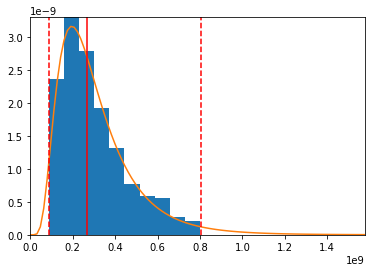

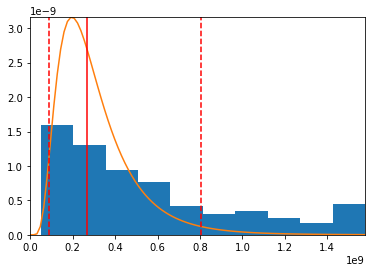

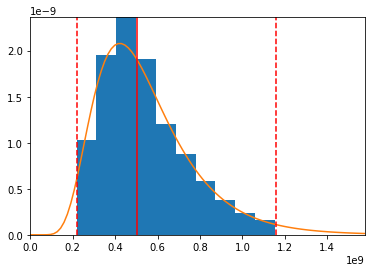

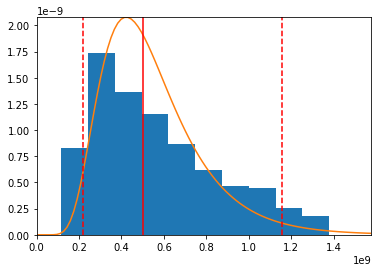

In [5]:
indices1 = np.where(names == 'WC1994_m2a')
indices2 = np.where(names == 'WC1994_m2l')
indices3 = np.where(names == 'ThingbaijamEA2017_m2a_n')
indices4 = np.where(names == 'ThingbaijamEA2017_m2l_n')

area_xs = np.linspace(0, areas.max(), 100)

sr = WC1994_m2a()
plt.hist(areas[indices1], density=True)
d = stats.lognorm(s=sr.SD*(np.log(10)), scale=sr.get_mean(magnitude))
plt.plot(area_xs, d.pdf(area_xs))
plt.axvline(sr.get_mean(magnitude), c='r')
sdmin, sdmax = sr.get_sd(magnitude, n=2)
plt.axvline(sdmin, c='r', ls='--')
plt.axvline(sdmax, c='r', ls='--')
plt.xlim(0, areas.max())
plt.show()

sr = WC1994_m2a()
plt.hist(areas[indices2], density=True)
d = stats.lognorm(s=sr.SD*(np.log(10)), scale=sr.get_mean(magnitude))
plt.plot(area_xs, d.pdf(area_xs))
plt.axvline(sr.get_mean(magnitude), c='r')
sdmin, sdmax = sr.get_sd(magnitude, n=2)
plt.axvline(sdmin, c='r', ls='--')
plt.axvline(sdmax, c='r', ls='--')
plt.xlim(0, areas.max())
plt.show()

sr = ThingbaijamEA2017_m2a_n()
plt.hist(areas[indices3], density=True)
d = stats.lognorm(s=sr.SD*(np.log(10)), scale=sr.get_mean(magnitude))
plt.plot(area_xs, d.pdf(area_xs))
plt.axvline(sr.get_mean(magnitude), c='r')
sdmin, sdmax = sr.get_sd(magnitude, n=2)
plt.axvline(sdmin, c='r', ls='--')
plt.axvline(sdmax, c='r', ls='--')
plt.xlim(0, areas.max())
plt.show()

sr = ThingbaijamEA2017_m2a_n()
plt.hist(areas[indices4], density=True)
d = stats.lognorm(s=sr.SD*(np.log(10)), scale=sr.get_mean(magnitude))
plt.plot(area_xs, d.pdf(area_xs))
plt.axvline(sr.get_mean(magnitude), c='r')
sdmin, sdmax = sr.get_sd(magnitude, n=2)
plt.axvline(sdmin, c='r', ls='--')
plt.axvline(sdmax, c='r', ls='--')
plt.xlim(0, areas.max())
plt.show()

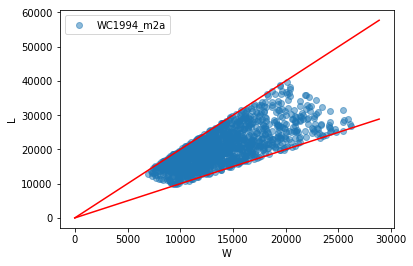

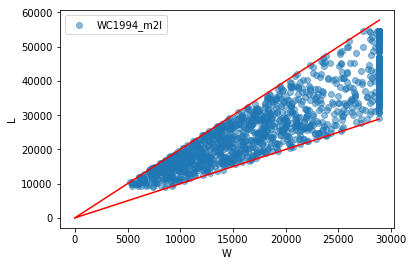

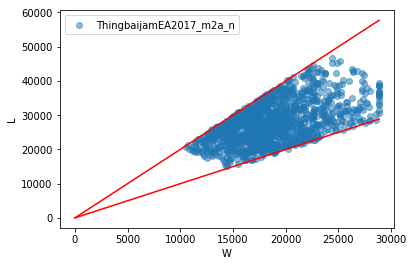

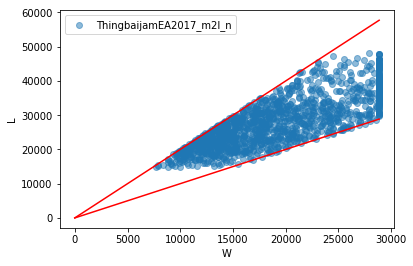

In [6]:
plt.scatter(ws[indices1], ls[indices1], alpha=0.5, label='WC1994_m2a')
plt.plot([0, fault.width], [0, fault.width*1], c='r')
plt.plot([0, fault.width], [0, fault.width*2], c='r')
plt.xlabel('W')
plt.ylabel('L')
plt.legend()
plt.show()

plt.scatter(ws[indices2], ls[indices2], alpha=0.5, label='WC1994_m2l')
plt.plot([0, fault.width], [0, fault.width*1], c='r')
plt.plot([0, fault.width], [0, fault.width*2], c='r')
plt.xlabel('W')
plt.ylabel('L')
plt.legend()
plt.show()

plt.scatter(ws[indices3], ls[indices3], alpha=0.5, label='ThingbaijamEA2017_m2a_n')
plt.plot([0, fault.width], [0, fault.width*1], c='r')
plt.plot([0, fault.width], [0, fault.width*2], c='r')
plt.xlabel('W')
plt.ylabel('L')
plt.legend()
plt.show()

plt.scatter(ws[indices4], ls[indices4], alpha=0.5, label='ThingbaijamEA2017_m2l_n')
plt.plot([0, fault.width], [0, fault.width*1], c='r')
plt.plot([0, fault.width], [0, fault.width*2], c='r')
plt.xlabel('W')
plt.ylabel('L')
plt.legend()
plt.show()

In [7]:
sr1 = WC1994_m2as()
sr2 = ThingbaijamEA2017_m2as_n()

slips = mw_to_m0(magnitude) / (areas * fault.rigidity)

i = np.argmax(slips)
print(slips[i], areas[i], ws[i], ls[i])

print(slips.mean(), sr1(magnitude), sr2(magnitude))

28301728.36000164 50028448.81973133 5430.189450769263 9213.020885052932
4365039.026516718 -0.3150000000000004 -0.46250000000000036


In [8]:
## Is this maximum average slip too high for a magnitude 6.5?

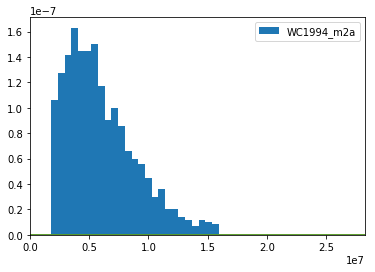

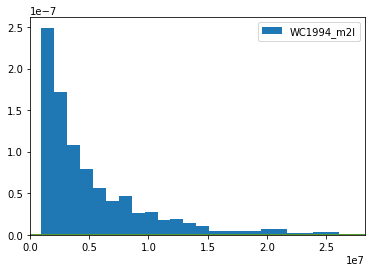

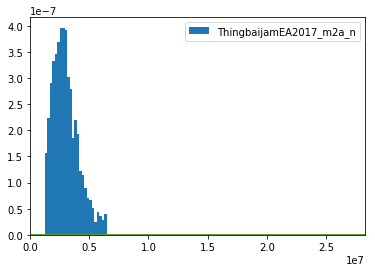

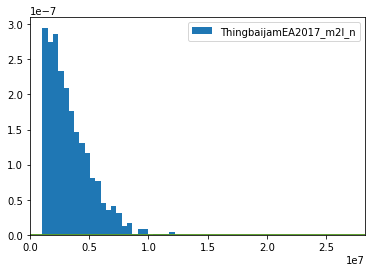

In [9]:
xs = np.linspace(0, slips[i], 100)

d1 = stats.lognorm(sr1.SD*np.log(10), scale=sr1.get_mean(magnitude)).pdf(xs)
d2 = stats.lognorm(sr2.SD*np.log(10), scale=sr1.get_mean(magnitude)).pdf(xs)

plt.hist(slips[indices1], bins=25, density=True, label='WC1994_m2a')
plt.plot(xs, d1)
plt.plot(xs, d2)
plt.xlim(0, slips[i])
plt.legend()
plt.show()

plt.hist(slips[indices2], bins=25, density=True, label='WC1994_m2l')
plt.plot(xs, d1)
plt.plot(xs, d2)
plt.xlim(0, slips[i])
plt.legend()
plt.show()

plt.hist(slips[indices3], bins=25, density=True, label='ThingbaijamEA2017_m2a_n')
plt.plot(xs, d1)
plt.plot(xs, d2)
plt.xlim(0, slips[i])
plt.legend()
plt.show()

plt.hist(slips[indices4], bins=25, density=True, label='ThingbaijamEA2017_m2l_n')
plt.plot(xs, d1)
plt.plot(xs, d2)
plt.xlim(0, slips[i])
plt.legend()
plt.show()